# Principal Component Analysis

## Introduction

In this exercise, you will experiment with two different techniques to compute the principal components of a dataset:

* **Basic PCA**: The standard technique based on singular value decomposition.


* **Iterative PCA**: A technique that progressively optimizes the PCA objective function.

Principal component analysis is applied here to modeling handwritten characters data (characters "O" and "I") using the dataset introduced in the paper "L.J.P. van der Maaten. 2009. A New Benchmark Dataset for Handwritten Character Recognition". The dataset consists of black and white images of $28 \times 28$ pixels, each representing a handwritten character. For the purpose of the PCA analysis, these images are interpreted as 784-dimensional vectors with values between 0 and 1. Three methods are provided for your convenience and are available in the module `utils` that is included in the zip archive. The methods are the following:

* **`utils.load()`** load data from the file `characters.csv` and stores them in a data matrix of size $4631 \times 784$. (The data is a subset of the original dataset available here: http://lvdmaaten.github.io/publications/misc/characters.zip)


* **`utils.scatterplot(...)`** produces a scatter plot from a two-dimensional data set. Each point in the scatter plot represents one handwritten character. This method provides a convenient way to produce two-dimensional PCA plots.


* **`utils.render(...)`** takes a matrix of size $n \times 784$ as input, interprets it as $n$ images of size $28 \times 28$, and renders these images in the IPython notebook.

A demo code that makes use of these methods is given below. It performs basic data analysis, for example, plotting simple statistics for each data point in the dataset, or rendering a few examples randomly selected from the dataset.

dataset size: (4631, 784)


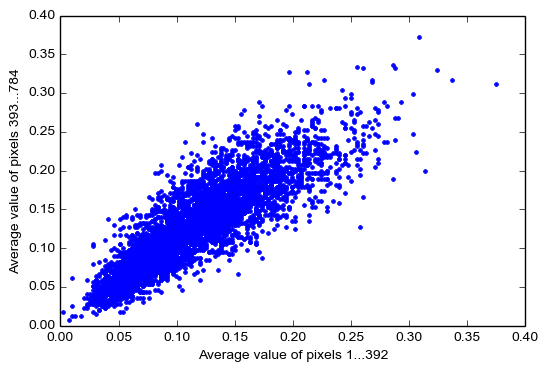

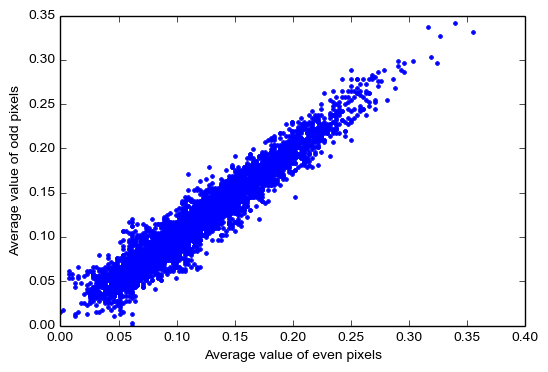

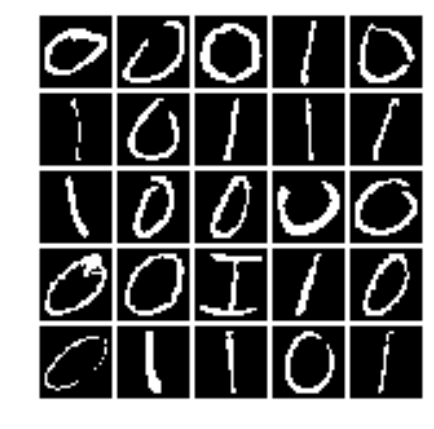

In [2]:
import utils,numpy
%matplotlib inline

# Load the characters "O" and "I" from the handwritten characters dataset
X = utils.load()

print('dataset size: %s'%str(X.shape))

# Plot some statistics of the data using the scatterplot function
utils.scatterplot(X[:,:392].mean(axis=1),X[:,392:].mean(axis=1),
                  xlabel='Average value of pixels 1...392',
                  ylabel='Average value of pixels 393...784')
utils.scatterplot(X[:,::2].mean(axis=1),X[:,1::2].mean(axis=1),
                  xlabel='Average value of even pixels',
                  ylabel='Average value of odd pixels')

# Render some randomly selected examples
R=numpy.random.randint(0,len(X),[25])
utils.render(X[R])

The preliminary data analysis above does not reveal particularly interesting structure in the data. For example scatter plots fail to let appear the two types of characters present in the dataset ("O" and "I"). Therefore, we would like to gain more insight on the dataset by performing a more sophisticated analysis based on PCA.

## PCA with Singular Value Decomposition (15 P)

As shown during the lecture, principal components can be found by solving the eigenvalue problem

$$
\boldsymbol{S} \boldsymbol{w} = \lambda \boldsymbol{w}.
$$

While we could eigendecompose the scatter matrix to find the desired eigenvalues and eigenvectors (for example, by using the function `numpy.linalg.eigh`), we usually prefer to recover principal components directly from singular value decomposition

$$
\boldsymbol{X} = \boldsymbol{U} \, \boldsymbol{\Sigma} \, \boldsymbol{V}^\top,
$$

where the principal components and projection of data onto these components can also be retrieved from the matrices $\boldsymbol{U}$, $\boldsymbol{\Sigma}$ and $\boldsymbol{V}$.

**Tasks:**

* **Compute the principal components of the data using the function `numpy.linalg.svd`.**
* **Measure the computational time required to find the principal components. Use the function `time.time()` for that purpose. Do *not* include in your estimate the computation overhead caused by loading the data, plotting and rendering.**
* **Plot the projection of the dataset on the first two principal components using the function `utils.scatterplot`.**
* **Visualize the 25 leading principal components using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, you might be doing something wrong.

Time: 35.105 seconds


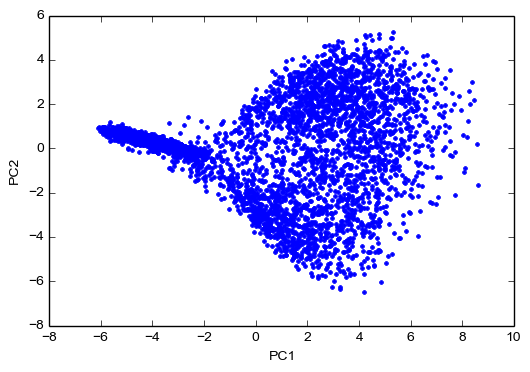

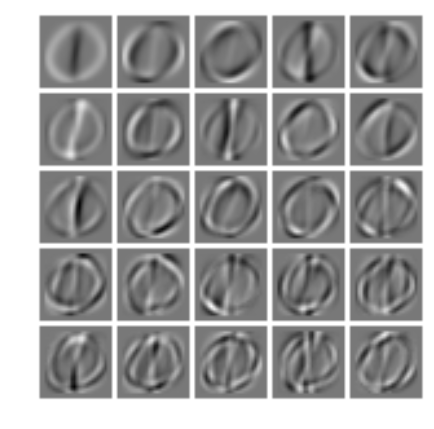

In [3]:
import time

# center data
mean = X.mean(axis=0)
X_minus_mean = X - mean

# calculate singular value decomposition
# where U are eigenvectors of XX', V are eigenvectors of X'X
# and S are the square root eigenvalues of XX' on the diagonal
start = time.time()
U,S,V = numpy.linalg.svd(X_minus_mean)
end = time.time()

# print measure time
print("Time: %.3f seconds" % (end - start))

# get indices of sorted values of to get largest eigenvectors
idx = S.argsort()[::-1]

# get first two largest eigenvectors
pc1 = V[idx[0],:]
pc2 = V[idx[1],:]

# transform data to two dimensions with both eigenvectors
# project dataset on the first and second principal component
x_pc1 = numpy.dot(X_minus_mean,pc1)
x_pc2 = numpy.dot(X_minus_mean,pc2)

# plot transformed data
utils.scatterplot(x_pc1, x_pc2, xlabel='PC1', ylabel='PC2')

# get first 25 principle components and render them
pc25 = V[idx[:25],:]
utils.render(pc25)

## Iterative PCA (15 P)

The objective that PCA optimizes is given by

$$
J(\boldsymbol{w}) = \boldsymbol{w}^\top \boldsymbol{S} \boldsymbol{w}
$$

subject to

$$
\boldsymbol{w}^\top \boldsymbol{w} = 1.
$$

The power iteration algorithm maximizes this objective using an iterative procedure. It starts with an initial weight vector $\boldsymbol{w}$, and iteratively applies the update rule

$$
\boldsymbol{w} \leftarrow \frac{\boldsymbol{S} \boldsymbol{w}}{\|\boldsymbol{S} \boldsymbol{w}\|}
$$

**Tasks:**

* **Implement the iterative procedure. Use as a stopping criterion the value of $J(\boldsymbol{w})$ between two iterations increasing by less than $0.01$.**
* **Print the value of the objective function $J(\boldsymbol{w})$ at each iteration.**
* **Measure the time taken to find the principal component.**
* **Visualize the the eigenvector $\boldsymbol{w}$ obtained after convergence using the function `utils.render`.**

Note that if the algorithm runs for more than 1 minute, you might be doing something wrong.

iteration  0   J(w) = 56577.650
iteration  1   J(w) = 60487.427
iteration  2   J(w) = 60617.945
iteration  3   J(w) = 60622.826
iteration  4   J(w) = 60623.032
iteration  5   J(w) = 60623.042
stopping criterion satisfied
Time: 2.404 seconds


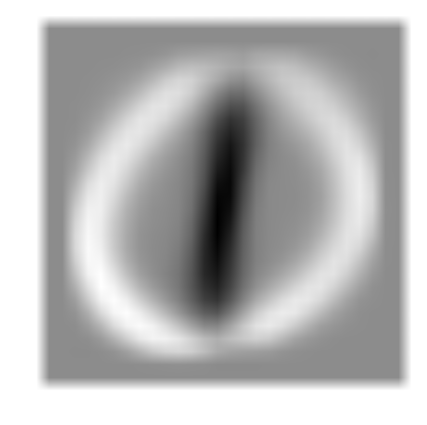

In [4]:
# take start time
start = time.time()

# get dimensions
n, d = X.shape

# calculate scatter matrix
S = numpy.dot(X_minus_mean.T, X_minus_mean)

# choose starting vector with length of 1
x = numpy.ones(d)
w = x / numpy.linalg.norm(x)

# loop steps
k, J, Jlast = 0, 0, 1
while abs(J-Jlast) >= 0.01:
    # save last J
    Jlast = J
    
    # caculate new w
    y = numpy.dot(S, w)
    w = y / numpy.linalg.norm(y)
    
    # calculate new J
    J = numpy.dot(numpy.dot(w.T, S), w)
    
    # print result of iteration step
    print("iteration  %d   J(w) = %.3f" % (k, J))
    
    # increase k
    k = k+1

# take end time
end = time.time()
 
# print measured time
print("stopping criterion satisfied")
print("Time: %.3f seconds" % (end - start))

utils.render(w[None, :])